In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [3]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [4]:
# read in data
df = pd.read_csv('datasets/creditcard.csv')

print(df.shape)
df.head()

(284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


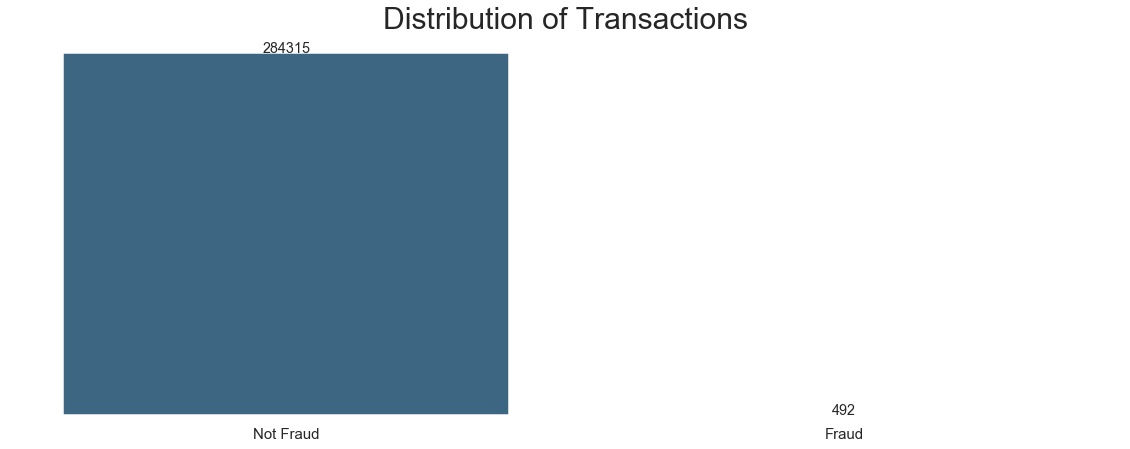

In [6]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(df.Class, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [7]:
# print percentage of questions where target == 1
(len(df.loc[df.Class==1])) / (len(df.loc[df.Class == 0])) * 100

0.17304750013189596

In [8]:
from sklearn.utils import resample

In [9]:
# Prepare data for modeling
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [10]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

Time        V1        V2        V3        V4        V5        V6  \
264873  161634.0 -0.395578  1.489129 -0.833442 -0.224271  0.369444 -1.453886   
163821  116237.0  1.950487  0.002312 -1.761814  1.232470  0.523175 -0.650657   
72083    54557.0  1.105167 -0.166253  0.569520  0.681043 -0.259189  0.642792   
196949  131771.0  1.805238  0.961264 -1.717212  4.094625  0.938666 -0.227785   
126213   77959.0  0.835421 -1.191847  0.578455  0.586101 -1.236663  0.194617   

              V7        V8        V9  ...       V21       V22       V23  \
264873  0.796593 -0.060403  0.338270  ...  0.231624  0.955194 -0.172092   
163821  0.504231 -0.200857  0.116805  ...  0.086306  0.326297 -0.068839   
72083  -0.437034  0.356746  0.441417  ...  0.009073  0.293023 -0.028688   
196949  0.152911  0.066753 -1.073784  ... -0.137875 -0.450959  0.098530   
126213 -0.532404  0.061561 -0.734344  ... -0.072349 -0.109154 -0.308356   

             V24       V25       V26       V27       V28  Amount  Class  
264873 -0.041050 -0.313444 -0.174301  0.064657 -0.036960    2.74      0  
163821 -0.416589  0.426044 -0.486299 -0.031266 -0.072543   38.44      0  
72083  -0.242206  0.389813  0.482852  0.010705 -0.008399    1.00      0  
196949 -0.662272 -0.150154 -0.098852 -0.000030  0.017622   37.89      0  
126213  0.011968  0.461350 -0.244810  0.031845  0.060910  237.00      0  

[5 rows x 31 columns]

# OverSampling

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with.

In [11]:
# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

In [12]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [13]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9807589674447347

In [14]:
# f1 score
f1_score(y_test, upsampled_pred)

0.14375000000000002

In [15]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

0     1
0  69717  1353
1     17   115

In [16]:
recall_score(y_test, upsampled_pred)

0.8712121212121212

# Synthetic sample generation

In [29]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [30]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9860397179854499